# 1. Preprocessing


In [ ]:
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz

--2021-09-11 06:43:20--  http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 495854086 (473M) [application/x-gzip]
Saving to: ‘reviews_Electronics_5.json.gz’

reviews_Electronics 100%[===================>] 472.88M  3.91MB/s    in 85s     

2021-09-11 06:44:45 (5.58 MB/s) - ‘reviews_Electronics_5.json.gz’ saved [495854086/495854086]



In [ ]:
!gzip -d reviews_Electronics_5.json.gz

In [ ]:
import json

In [ ]:
data = []
for line in open('reviews_Electronics_5.json', 'r'):
    data.append(json.loads(line))

In [ ]:
len(data)

1689188

In [ ]:
data[0]

{'asin': '0528881469',
 'helpful': [0, 0],
 'overall': 5.0,
 'reviewText': 'We got this GPS for my husband who is an (OTR) over the road trucker.  Very Impressed with the shipping time, it arrived a few days earlier than expected...  within a week of use however it started freezing up... could of just been a glitch in that unit.  Worked great when it worked!  Will work great for the normal person as well but does have the "trucker" option. (the big truck routes - tells you when a scale is coming up ect...)  Love the bigger screen, the ease of use, the ease of putting addresses into memory.  Nothing really bad to say about the unit with the exception of it freezing which is probably one in a million and that\'s just my luck.  I contacted the seller and within minutes of my email I received a email back with instructions for an exchange! VERY impressed all the way around!',
 'reviewTime': '06 2, 2013',
 'reviewerID': 'AO94DHGC771SJ',
 'reviewerName': 'amazdnu',
 'summary': 'Gotta have GP

In [ ]:
reviews = [entry["reviewText"] for entry in data]

In [ ]:
reviews = reviews[:50000]

In [ ]:
reviews[:3]

['We got this GPS for my husband who is an (OTR) over the road trucker.  Very Impressed with the shipping time, it arrived a few days earlier than expected...  within a week of use however it started freezing up... could of just been a glitch in that unit.  Worked great when it worked!  Will work great for the normal person as well but does have the "trucker" option. (the big truck routes - tells you when a scale is coming up ect...)  Love the bigger screen, the ease of use, the ease of putting addresses into memory.  Nothing really bad to say about the unit with the exception of it freezing which is probably one in a million and that\'s just my luck.  I contacted the seller and within minutes of my email I received a email back with instructions for an exchange! VERY impressed all the way around!',
 'I\'m a professional OTR truck driver, and I bought a TND 700 at a truck stop hoping to make my life easier.  Rand McNally, are you listening?First thing I did after charging it was connec

In [ ]:
from collections import Counter

In [ ]:
c = Counter()

In [ ]:
i = 0
for review in reviews:
  if i%(len(reviews)//5) == 0:
    print(i)
  i+=1
  words = review.split()
  for word in words:
    c[word.lower()]+=1

0
10000
20000
30000
40000


In [ ]:
len(c)

193596

In [ ]:
too_infrequent = 0

In [ ]:
for word in c:
  if c[word]<5:
    too_infrequent+=1

In [ ]:
len(c) - too_infrequent

28014

In [ ]:
cleaned_reviews = []

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
x = tokenizer.tokenize('Eighty-seven miles to go, yet.  Onward!')

In [ ]:
len(reviews)

50000

In [ ]:
reviews[:3]

['We got this GPS for my husband who is an (OTR) over the road trucker.  Very Impressed with the shipping time, it arrived a few days earlier than expected...  within a week of use however it started freezing up... could of just been a glitch in that unit.  Worked great when it worked!  Will work great for the normal person as well but does have the "trucker" option. (the big truck routes - tells you when a scale is coming up ect...)  Love the bigger screen, the ease of use, the ease of putting addresses into memory.  Nothing really bad to say about the unit with the exception of it freezing which is probably one in a million and that\'s just my luck.  I contacted the seller and within minutes of my email I received a email back with instructions for an exchange! VERY impressed all the way around!',
 'I\'m a professional OTR truck driver, and I bought a TND 700 at a truck stop hoping to make my life easier.  Rand McNally, are you listening?First thing I did after charging it was connec

In [ ]:
cleaned_reviews = []

In [ ]:
i = 0
for review in reviews:
  if i%(len(reviews)//5) == 0:
    print(i)
  i+=1
  words = tokenizer.tokenize(review)
  new_words = []
  for word in words:
    word = word.lower()
    if c[word]>=5 and word not in stop_words:
      new_words.append(word)
  new_review = " ".join(new_words)
  cleaned_reviews.append(new_review)

0
10000
20000
30000
40000


In [ ]:
cleaned_reviews[:3]

['got gps husband road trucker impressed shipping time arrived days earlier expected within week use however started freezing could glitch unit worked great worked work great normal person well trucker option big truck routes tells scale coming love bigger screen ease use ease putting addresses memory nothing really bad say unit exception freezing probably one million luck contacted seller within minutes email received email back instructions exchange impressed way around',
 'professional truck driver bought tnd 700 truck stop hoping make life easier rand mcnally listening first thing charging connect laptop install software attempt update software detected problem update wanted home address could sent patch sd card hello think unusual home address box friend checks weekly might get check every six months live truck truck stops need make patch available sd card send sd cards truck stops devices sold ran update program multiple times program said tnd 700 completely updated programmed he

In [ ]:
with open('reviews.txt', 'w') as f:
    for item in cleaned_reviews:
        f.write("%s\n" % item)

# 2. CBOW Model

In [ ]:
with open('reviews.txt') as file:
    cleaned_reviews = file.readlines()
    cleaned_reviews = [line.rstrip() for line in cleaned_reviews]

In [ ]:
len(cleaned_reviews)

50000

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from collections import Counter
from nltk.tokenize import word_tokenize
from tqdm import tqdm

In [ ]:
WINDOWS_SIZE = 2
EMBEDDING_DIM = 10
BATCH_SIZE = 1000
NUM_EPOCH = 5

In [ ]:
class Text2DataSet(Dataset):
    """
    We are just training word embeddings, what we need is just text,
    And thus we do not perform train, val, test splitting and sort of
    things. You can change the data file to whatever you want as long
    as it's plain text, and it's not that big.
    It's toy implementation, train on rather small dataset,
    so we don't restrict vocabulary size.
    """
    def __init__(self, window_size=2):
        """
        :param data_file_path: path for the plain text file
        :param ngram:  language model n-grams
        """
        self.context_target = []
        self.vocab = set()
        for review in cleaned_reviews:
          words_tokenized = review.split()
          for word in words_tokenized:
            self.vocab.add(word)
          for i in range(window_size, len(words_tokenized)-window_size):
            self.context_target.append(([words_tokenized[i-(j+1)] for j in range(window_size)] +\
                                 [words_tokenized[i+(j+1)] for j in range(window_size)],
                                words_tokenized[i]))

        self.word_to_idx = {word_tuple: idx for idx, word_tuple in enumerate(self.vocab)}
        self.idx_to_word = list(self.word_to_idx.keys())
        self.vocab_size = len(self.vocab)
        self.window_size = window_size

    def __getitem__(self, idx):
        context = torch.tensor([self.word_to_idx[w] for w in self.context_target[idx][0]])
        target = torch.tensor([self.word_to_idx[self.context_target[idx][1]]])
        return context, target

    def __len__(self):
        return len(self.context_target)

In [ ]:
data = Text2DataSet()

In [ ]:
class CBOW(nn.Module):

    def __init__(self, vocab_size, embedding_dim, window_size):
        super(CBOW, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear = nn.Linear(embedding_dim, vocab_size)
        self.window_size = window_size

    def forward(self, inputs):

        embeds = torch.sum(self.embeddings(inputs), dim=1)
        out = self.linear(embeds) # nonlinear + projection
        log_probs = F.log_softmax(out, dim=1) # softmax compute log probability

        return log_probs

In [ ]:
model = CBOW(len(data.vocab), EMBEDDING_DIM, WINDOWS_SIZE)

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_function = nn.NLLLoss()
data_loader = DataLoader(data, batch_size=BATCH_SIZE)

In [ ]:
cuda_available = torch.cuda.is_available()

In [ ]:
for epoch in range(NUM_EPOCH):
    total_loss = 0
    for context, target in tqdm(data_loader):
        # context: torch.Size([10, 4])
        # target:  torch.Size([10, 1])
        if context.size()[0] != BATCH_SIZE:
            continue
        # deal with last several batches

        if cuda_available:
            context = context.cuda()
            target = target.squeeze(1).cuda()
            model = model.cuda()

        model.zero_grad()
        log_probs = model(context)
        loss = loss_function(log_probs, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()


100%|██████████| 2458/2458 [01:04<00:00, 37.95it/s]


In [ ]:
my_words = ['camera','clean','depressed','run','wallet']

In [ ]:
from numpy.linalg import norm
all_vec = [[] for i in my_words]

In [ ]:

for k,my_word in enumerate(my_words):
  for j,other_word in enumerate(data.vocab):
    vec1 = model.embeddings.weight[data.word_to_idx[my_word]]
    vec2 = model.embeddings.weight[data.word_to_idx[other_word]]
    dist = norm(vec1.cpu().detach().numpy()-vec2.cpu().detach().numpy())
    all_vec[k].append({other_word:dist})

In [ ]:
for i,item in enumerate(all_vec):
  all_vec[i] = sorted(all_vec[i], key=lambda x: list(x.values())[0])

In [ ]:
final_words = []

In [ ]:
for i,item in enumerate(all_vec):
  print(f"For {my_words[i]}:")
  for j in all_vec[i][1:11]:
    word_key = list(j.keys())[0]
    print(word_key)
    final_words.append(word_key)
  print()

For camera:
tripod
bag
macro
predict
accessory
body
dslr
merge
step
plan

For clean:
nice
scheme
illusion
matters
brilliant
art
missing
wonderful
leaves
detailed

For depressed:
forgets
adjust
push
presses
compress
vigorous
studying
mucking
scrolls
grasp

For run:
runs
single
play
manage
computer
separate
travels
dedicate
bring
staring

For wallet:
roomy
holder
carrying
storage
esoteric
storing
case
anchor
bulky
stacked



# 3. Plotting

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
def tsne_plot():
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in final_words:
        tokens.append(model.embeddings.weight[data.word_to_idx[word]].cpu().detach().numpy())
        labels.append(word)
    
    tsne_model = TSNE(perplexity=15, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [ ]:
len(final_words)

50

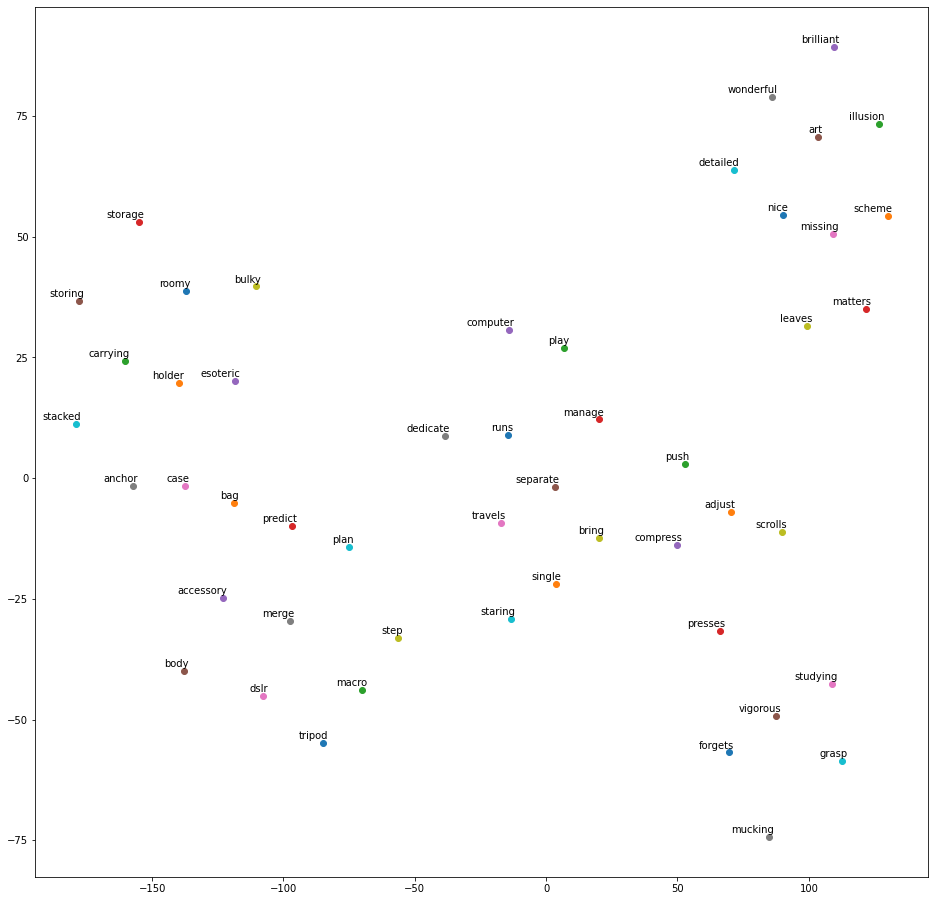

In [ ]:
tsne_plot()